In [4]:
# !wget https://raw.githubusercontent.com/dasarpai/DAI-Projects/main/Infra/House-Price-Prediction_dep/kc_house_data.csv

In [5]:
# !pip install pycaret

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import pickle

data = pd.read_csv("kc_house_data.csv")

In [7]:
pd.set_option('display.max_columns', None)
# pd.options(display.width, 1000
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# Convert the date column to datetime objects
data['date'] = pd.to_datetime(data['date'])

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA & Understanding Variables

In [10]:
# Overview of the dataset
print(data.shape)  # Number of rows and columns

(21613, 21)


In [11]:
print(data.columns)  # Column names

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [12]:
print(data.info())  # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21611 non-null  float64       
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [13]:
data['bathrooms'] = data['bathrooms'].round()
data['floors'] = data['floors'].round()

In [14]:
print(data.describe().transpose())  # Summary statistics for numerical columns

                 count                           mean                  min  \
id             21613.0              4580301520.864988            1000102.0   
date             21613  2014-10-29 04:38:01.959931648  2014-05-02 00:00:00   
price          21613.0                  540088.141767              75000.0   
bedrooms       21613.0                       3.370842                  0.0   
bathrooms      21613.0                       2.058715                  0.0   
sqft_living    21613.0                    2079.899736                290.0   
sqft_lot       21613.0                   15106.967566                520.0   
floors         21613.0                       1.534956                  1.0   
waterfront     21613.0                       0.007542                  0.0   
view           21613.0                       0.234303                  0.0   
condition      21613.0                        3.40943                  1.0   
grade          21613.0                       7.656873           

In [15]:
print(data.isnull().sum())  # Checking for missing values


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [16]:
# data['sqft_above'].fillna(data['sqft_above'].mean(), inplace=True)
data['sqft_above'] = data['sqft_above'].fillna(data['sqft_above'].mean())


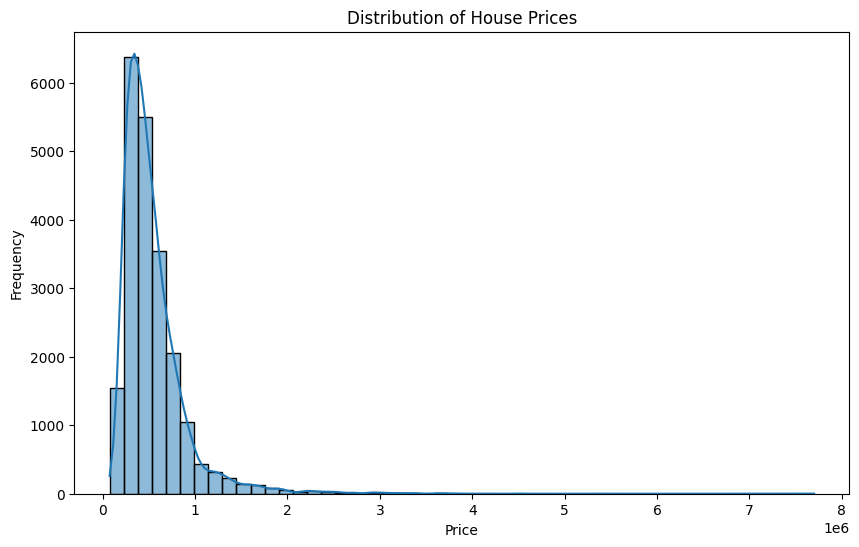

In [17]:
# Price Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


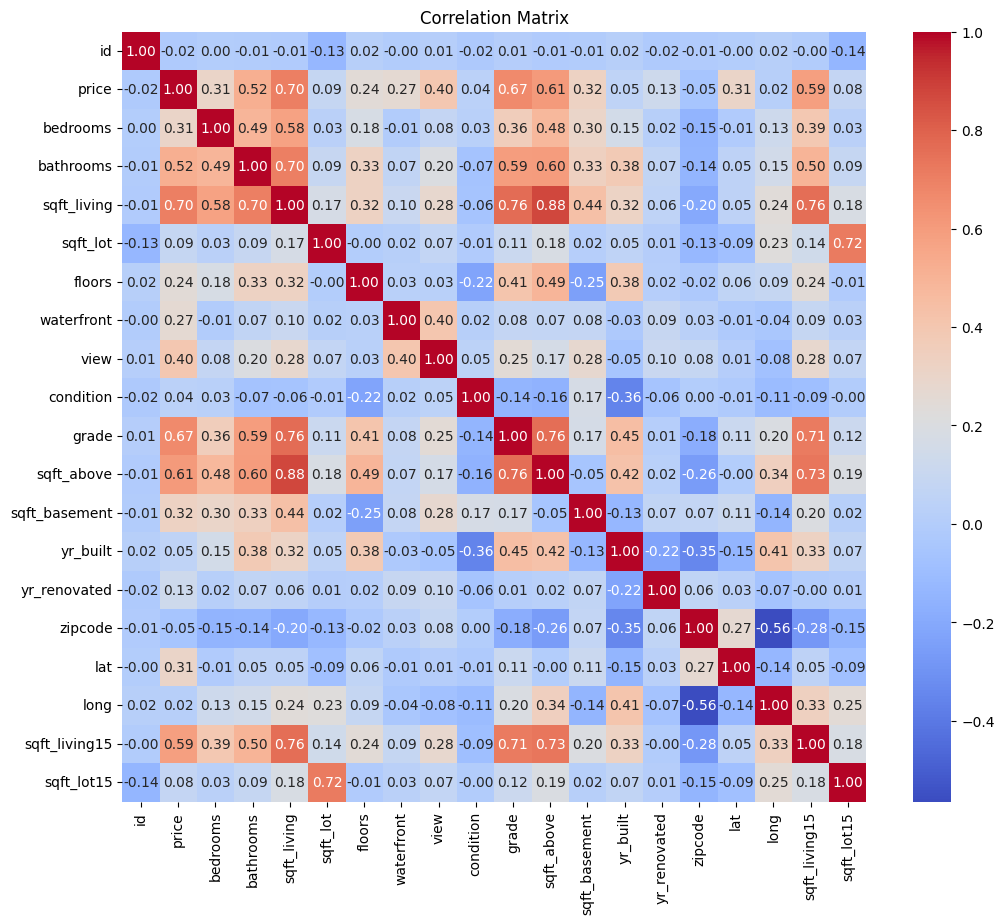

In [18]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.select_dtypes(include="number").corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [19]:
# # Choosing relevant columns for pairplot
# cols = ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors', 'sqft_lot', 'grade']
# sns.pairplot(data[cols])
# plt.show()


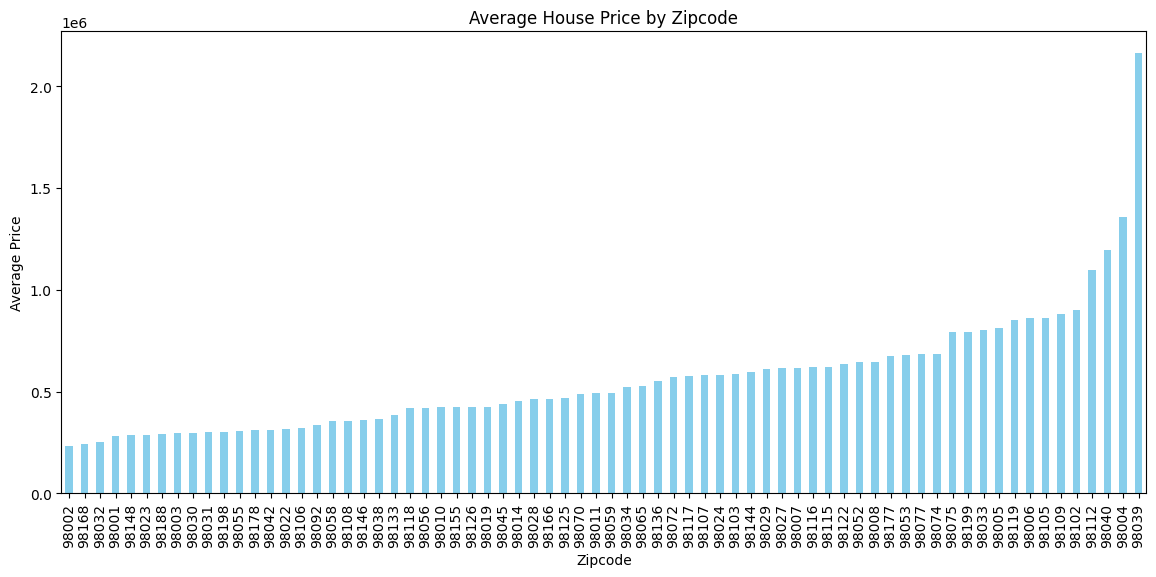

In [20]:
plt.figure(figsize=(14, 6))
data.groupby('zipcode')['price'].mean().sort_values().plot(kind='bar', color='skyblue')
plt.title('Average House Price by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


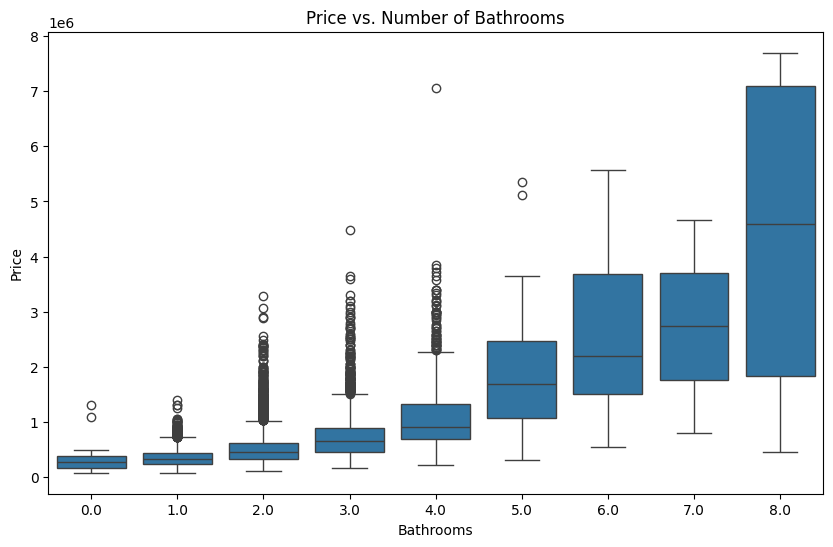

In [21]:
# Rounding the 'bathrooms' column to the nearest whole number
data['bathrooms'] = data['bathrooms'].round()

# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='bathrooms', y='price')
plt.title('Price vs. Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()


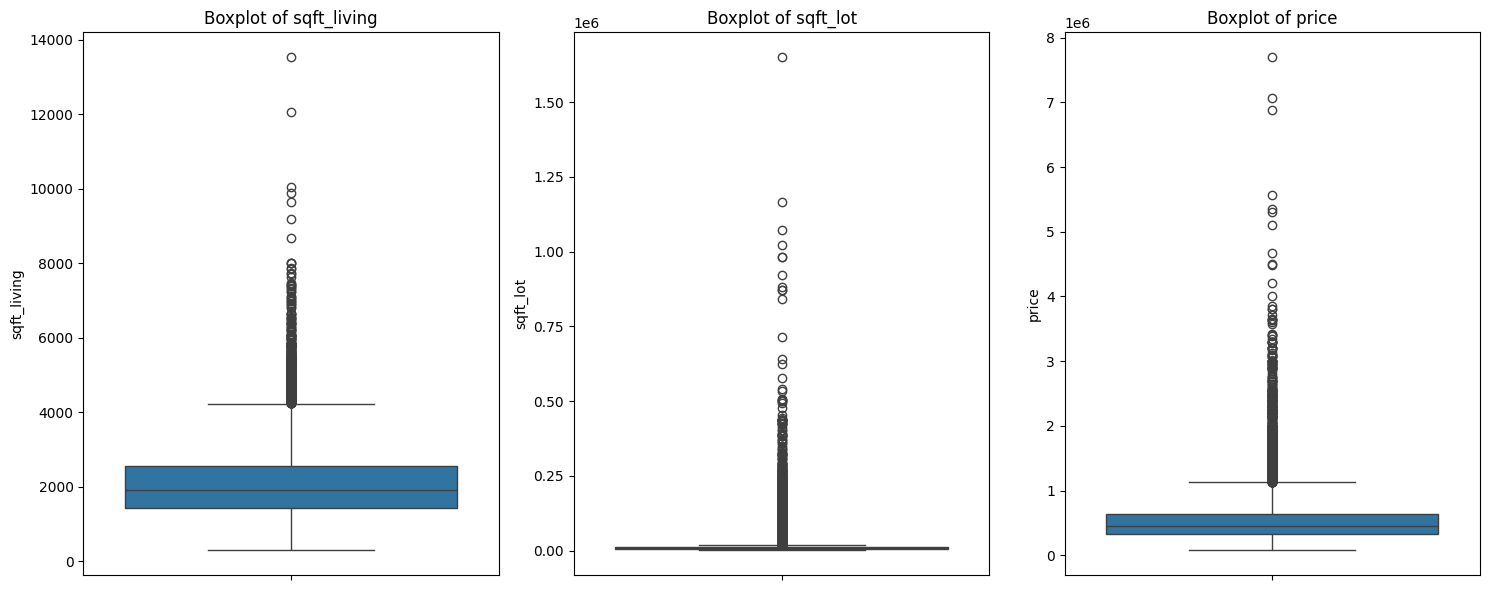

In [22]:
# Checking Outliers
features = ['sqft_living', 'sqft_lot', 'price']
plt.figure(figsize=(15, 6))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


In [23]:
# prompt: Columns 'sqft_living', 'sqft_lot', 'price' have outliers. I need to convert them in log10 scale.

# Apply log10 transformation to specified columns
for col in ['sqft_living', 'sqft_lot', 'price']:
    data[col] = np.log10(data[col])

In [24]:
#fixing outliners

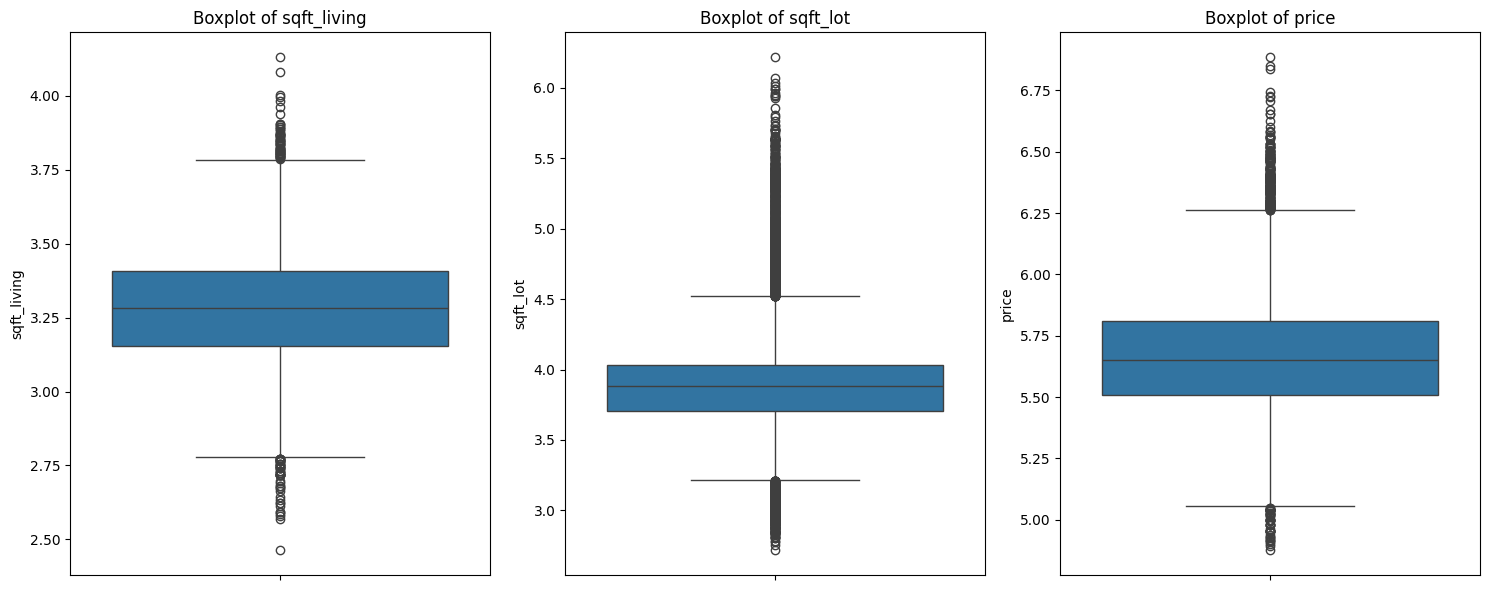

In [25]:
#checking again
# Checking Outliers
features = ['sqft_living', 'sqft_lot', 'price']
plt.figure(figsize=(15, 6))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [26]:
data.shape

(21613, 21)

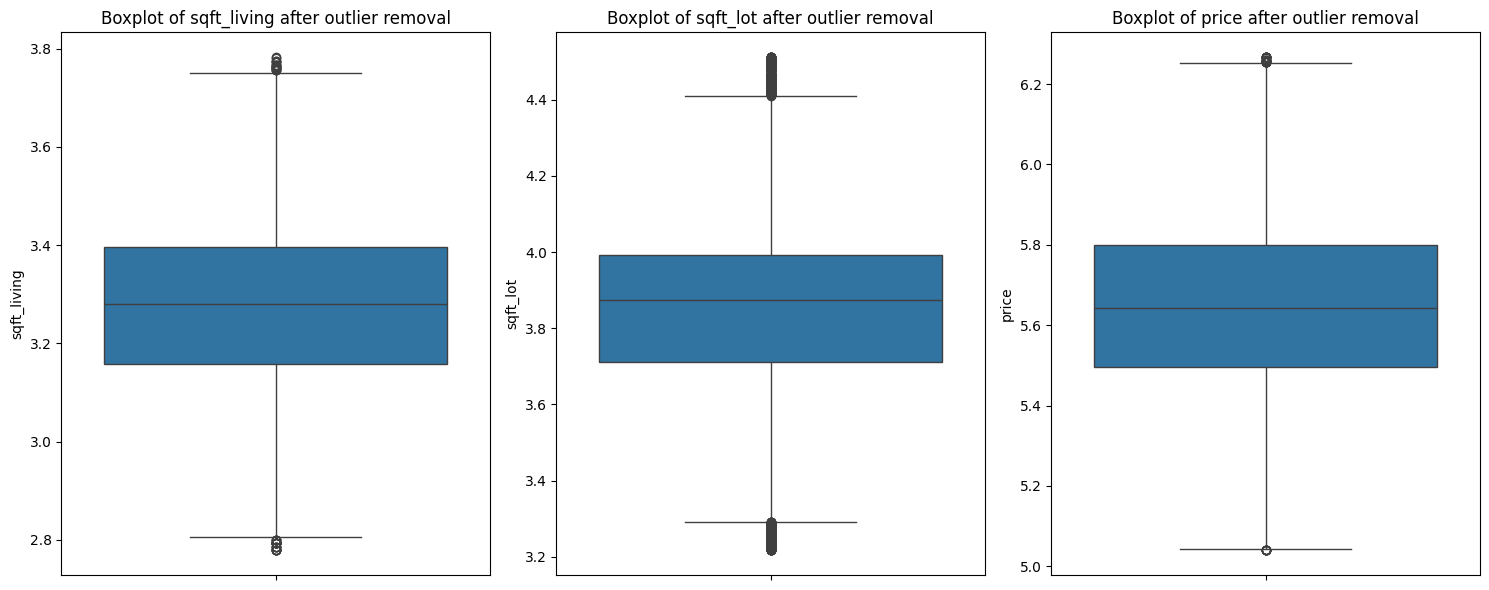

In [27]:
# prompt: Still there are outliers. How to handle those?

# Identify outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Example usage:
features_to_check = ['sqft_living', 'sqft_lot', 'price']
data = remove_outliers_iqr(data, features_to_check)

# Recheck outliers after removal
plt.figure(figsize=(15, 6))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data[feature])
    plt.title(f'Boxplot of {feature} after outlier removal')
plt.tight_layout()
plt.show()

In [28]:
data.shape # Removed 21613 - 18713 = 2900 Rows

(18713, 21)

In [29]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Checking for unique values in categorical columns to detect anomalies
print("Unique values in 'bedrooms':", data['bedrooms'].unique())
print("Unique values in 'bathrooms':", data['bathrooms'].unique())
print("Unique values in 'floors':", data['floors'].unique())


Missing Values:
 Series([], dtype: int64)
Unique values in 'bedrooms': [ 3  2  4  5  1  6  0  7  8  9 11 10 33]
Unique values in 'bathrooms': [1. 2. 3. 4. 0. 5. 8. 6.]
Unique values in 'floors': [1. 2. 3. 4.]


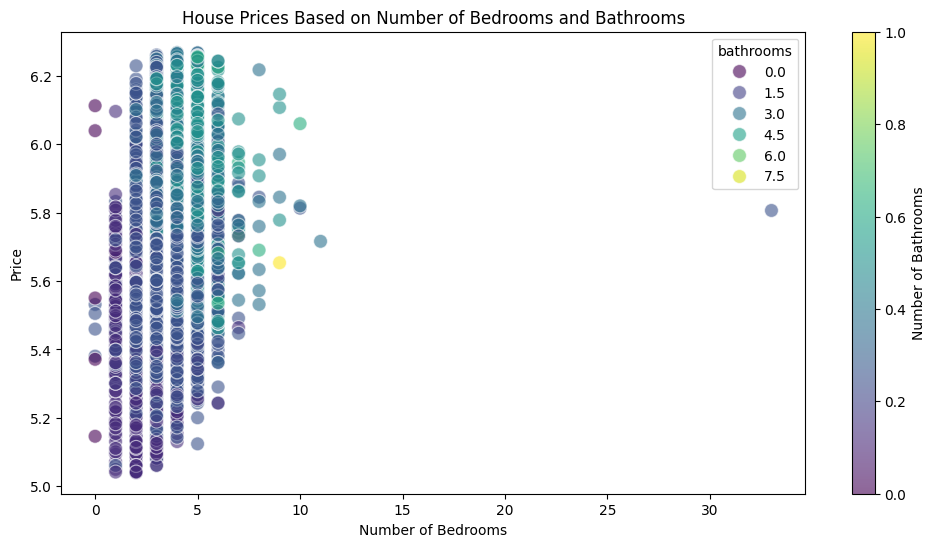

In [30]:
# How do the number of bedrooms and bathrooms influence the price?
# Visualization: Relationship between number of bedrooms, bathrooms, and price
plt.figure(figsize=(12, 6))

# Create the scatter plot and store the result in a variable
scatter = sns.scatterplot(data=data, x='bedrooms', y='price', hue='bathrooms', palette='viridis', s=100, alpha=0.6)

plt.title('House Prices Based on Number of Bedrooms and Bathrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

# Get the colorbar from the scatter plot object
plt.colorbar(scatter.collections[0], label='Number of Bathrooms')

plt.show()

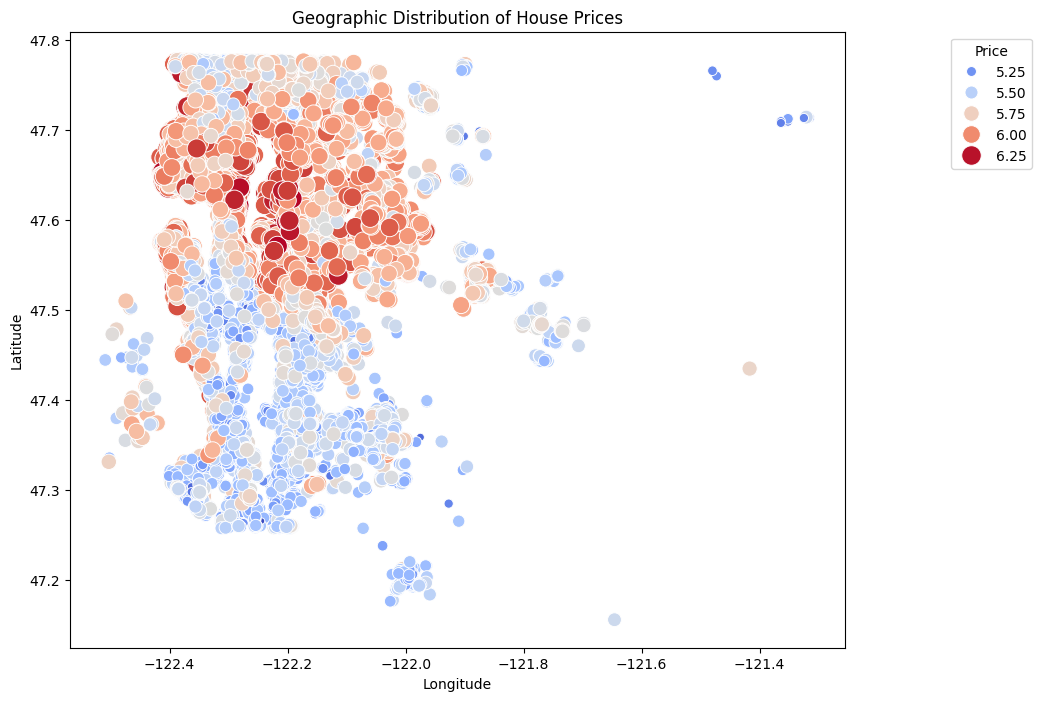

In [31]:
# How does the location (latitude and longitude) affect house prices?
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=data, x='long', y='lat', hue='price', size='price', palette='coolwarm', sizes=(20, 200), legend='brief')
plt.title('Geographic Distribution of House Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title="Price", loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()



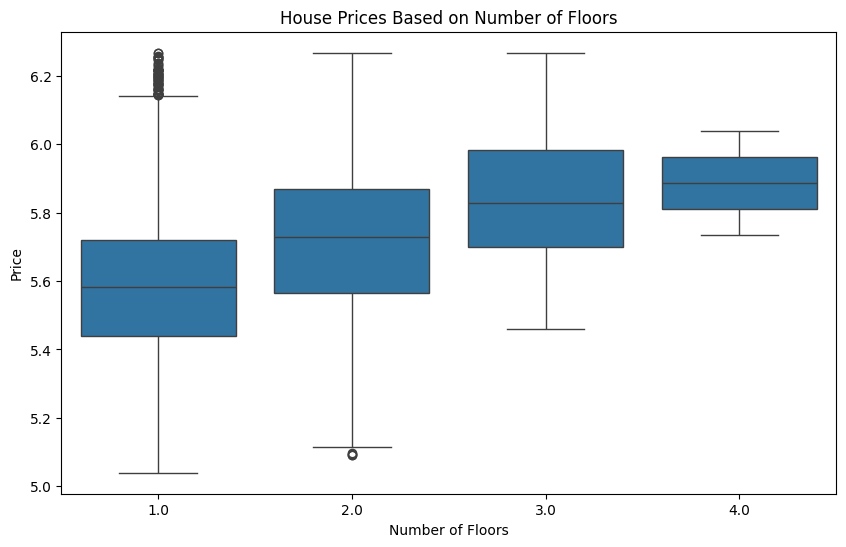

In [32]:
# Do properties with more floors have a higher average price?
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='floors', y='price')
plt.title('House Prices Based on Number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.show()



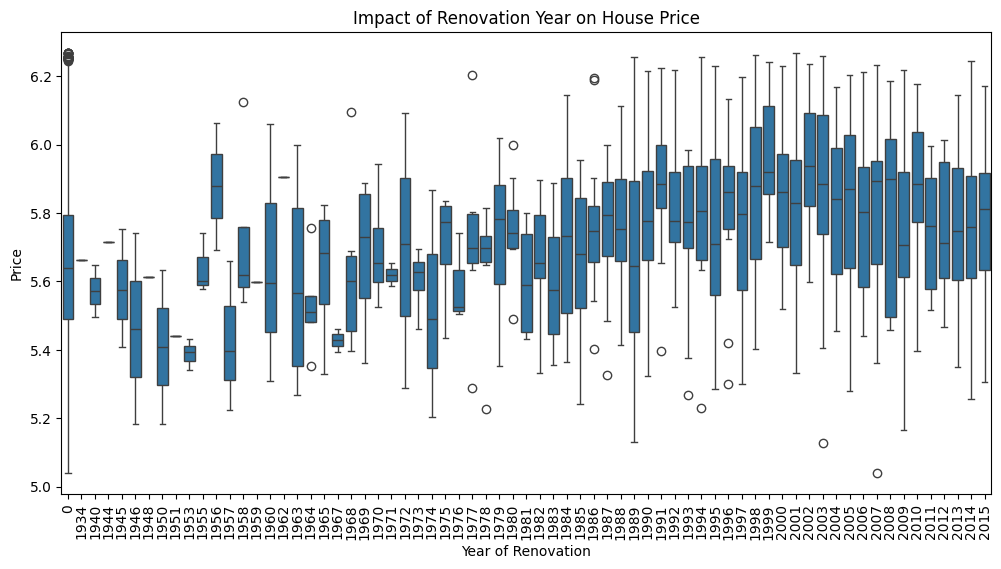

In [33]:
# Does the year of renovation impact the price?


plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='yr_renovated', y='price')
plt.xticks(rotation=90)
plt.title('Impact of Renovation Year on House Price')
plt.xlabel('Year of Renovation')
plt.ylabel('Price')
plt.show()


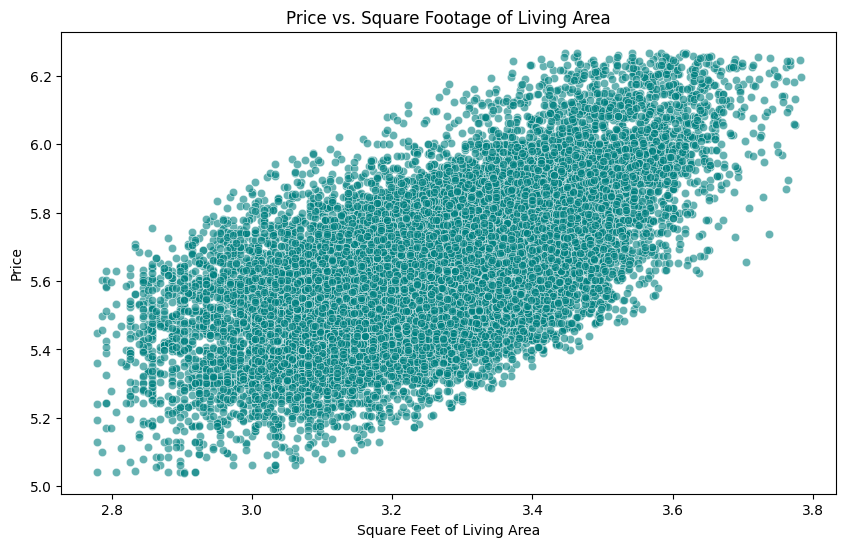

In [34]:
#How does sqft_living compare to price?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sqft_living', y='price', color='teal', alpha=0.6)
plt.title('Price vs. Square Footage of Living Area')
plt.xlabel('Square Feet of Living Area')
plt.ylabel('Price')
plt.show()


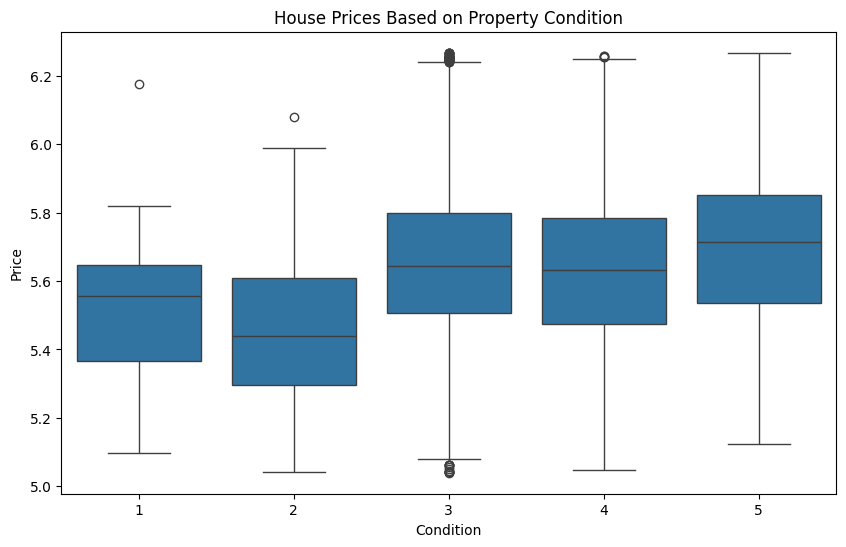

In [35]:
# Does the condition of the property correlate with the price?
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='condition', y='price')
plt.title('House Prices Based on Property Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()


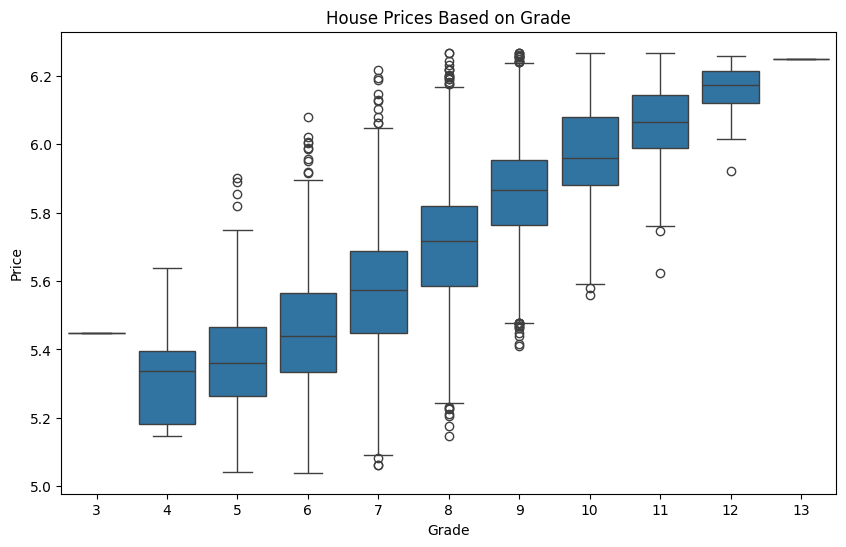

In [36]:
# How does the grade of the property affect the price?
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='grade', y='price')
plt.title('House Prices Based on Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()


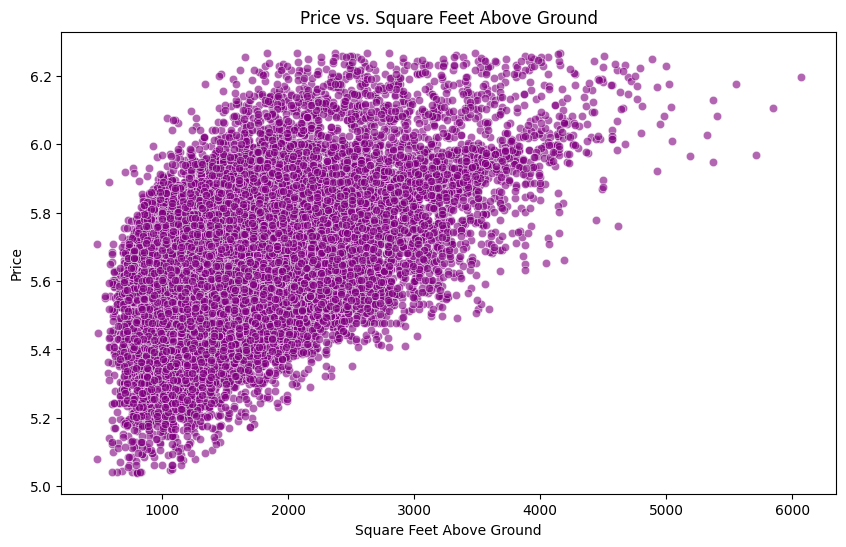

In [37]:
# Is there a relationship between sqft_above and price?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sqft_above', y='price', color='purple', alpha=0.6)
plt.title('Price vs. Square Feet Above Ground')
plt.xlabel('Square Feet Above Ground')
plt.ylabel('Price')
plt.show()


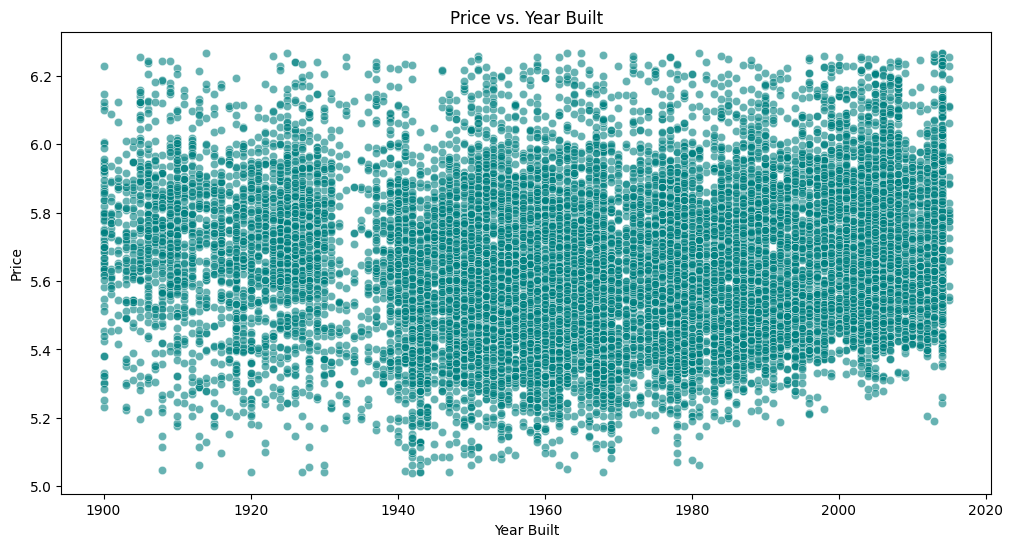

In [38]:
# How does the age of the property (year built) affect its price?
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='yr_built', y='price', color='teal', alpha=0.6)
plt.title('Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()


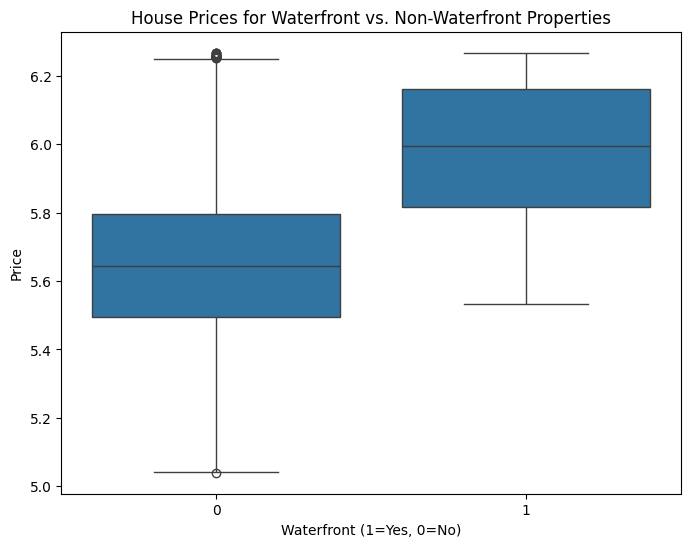

In [39]:
# How does having a waterfront view impact the price?
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='waterfront', y='price')
plt.title('House Prices for Waterfront vs. Non-Waterfront Properties')
plt.xlabel('Waterfront (1=Yes, 0=No)')
plt.ylabel('Price')
plt.show()


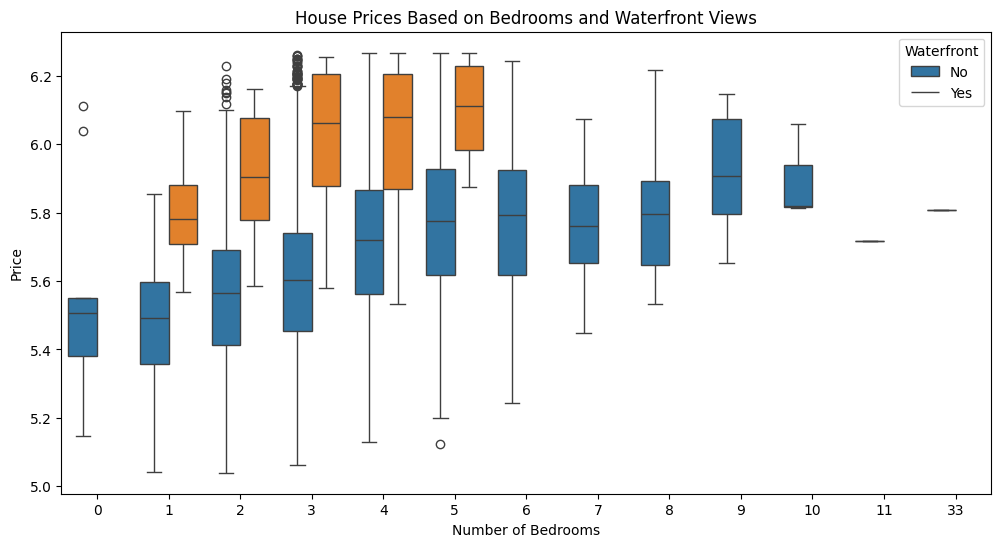

In [40]:
#How do waterfront views and the number of bedrooms together impact the price?

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='bedrooms', y='price', hue='waterfront')
plt.title('House Prices Based on Bedrooms and Waterfront Views')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.legend(title="Waterfront", labels=["No", "Yes"])
plt.show()


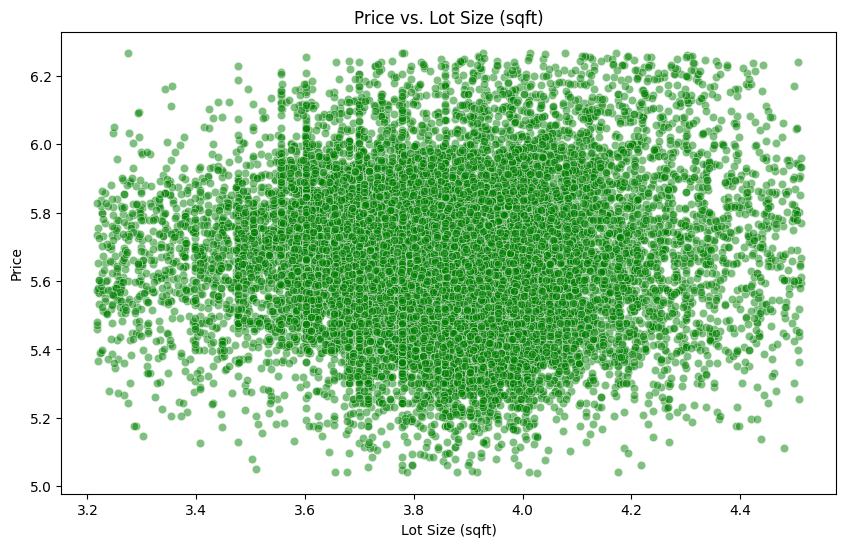

In [41]:
# Does larger lot size (sqft_lot) increase the price?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sqft_lot', y='price', color='green', alpha=0.5)
plt.title('Price vs. Lot Size (sqft)')
plt.xlabel('Lot Size (sqft)')
plt.ylabel('Price')
plt.show()


In [42]:
import pycaret
import sklearn

print(pycaret.__version__)
print(sklearn.__version__)

3.3.2
1.4.2


In [43]:
# !pip uninstall -y scikit-learn
# !pip install scikit-learn==1.0.2
# !pip install --upgrade pycaret



In [44]:
import pycaret
from pycaret.regression import *

# Setting up PyCaret regression environment
regression_setup = setup(data=data, target='price', session_id=123)



,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(18713, 21)"
4,Transformed data shape,"(18713, 23)"
5,Transformed train set shape,"(13099, 23)"
6,Transformed test set shape,"(5614, 23)"
7,Numeric features,19
8,Date features,1
9,Preprocess,True


In [45]:
# Comparing all available regression models
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0491,0.0046,0.0676,0.9015,0.0102,0.0087,1.6870
xgboost,Extreme Gradient Boosting,0.0508,0.0049,0.0700,0.8945,0.0106,0.0090,0.6880
et,Extra Trees Regressor,0.0520,0.0053,0.0725,0.8867,0.0110,0.0092,8.0550
rf,Random Forest Regressor,0.0525,0.0054,0.0733,0.8844,0.0111,0.0093,15.2500
gbr,Gradient Boosting Regressor,0.0553,0.0056,0.0749,0.8791,0.0113,0.0098,3.4980
ada,AdaBoost Regressor,0.0791,0.0102,0.1009,0.7805,0.0152,0.0140,1.5790
lr,Linear Regression,0.0805,0.0109,0.1041,0.7663,0.0156,0.0142,0.6720
ridge,Ridge Regression,0.0805,0.0109,0.1041,0.7663,0.0156,0.0142,0.1150
br,Bayesian Ridge,0.0805,0.0109,0.1041,0.7663,0.0156,0.0142,0.0690
dt,Decision Tree Regressor,0.0765,0.0111,0.1053,0.7609,0.0159,0.0136,0.4410


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [46]:
# Creating a lightgbm regressor model
lightgbm_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0493,0.0049,0.0699,0.8910,0.0106,0.0088
1,0.0487,0.0044,0.0665,0.9031,0.0101,0.0086
2,0.0501,0.0046,0.0681,0.9034,0.0103,0.0089
3,0.0508,0.0048,0.0695,0.9047,0.0105,0.0090
4,0.0475,0.0041,0.0640,0.9109,0.0097,0.0084
5,0.0512,0.0050,0.0710,0.8911,0.0107,0.0091
6,0.0494,0.0050,0.0709,0.8921,0.0108,0.0088
7,0.0469,0.0041,0.0640,0.9111,0.0097,0.0083
8,0.0474,0.0042,0.0648,0.9064,0.0098,0.0084


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [47]:
# Tuning the model
tuned_lightgbm_model = tune_model(lightgbm_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0591,0.0065,0.0807,0.8545,0.0122,0.0105
1,0.0571,0.0059,0.0766,0.8718,0.0115,0.0101
2,0.0587,0.0063,0.0792,0.8692,0.0120,0.0104
3,0.0592,0.0063,0.0796,0.8750,0.0120,0.0105
4,0.0560,0.0054,0.0736,0.8822,0.0111,0.0099
5,0.0603,0.0066,0.0812,0.8576,0.0122,0.0107
6,0.0596,0.0068,0.0826,0.8533,0.0125,0.0106
7,0.0555,0.0057,0.0755,0.8761,0.0114,0.0098
8,0.0575,0.0060,0.0776,0.8660,0.0117,0.0102


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [49]:
# Evaluating the model
evaluate_model(tuned_lightgbm_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [50]:
# Finalizing the model
final_model = finalize_model(tuned_lightgbm_model)


In [51]:
# Predicting on new data
predictions = predict_model(final_model, data)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0429,0.0034,0.0585,0.9261,0.0089,0.0076


In [52]:
# Saving the model
save_model(final_model, 'house_price_regression_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['id', 'bedrooms', 'bathrooms',
                                              'sqft_living', 'sqft_lot',
                                              'floors', 'waterfront', 'view',
                                              'condition', 'grade', 'sqft_above',
                                              'sqft_basement', 'yr_built',
                                              'yr_renovated', 'zipcode', 'lat',
                                              'long', 'sqft_living15',
                                              'sqft_lot15'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(i

In [54]:
predictions

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,prediction_label
0,7129300520,2014-10-13,3,1.0,3.071882,3.752048,1.0,0,0,3,...,0,1955,0,98178,47.511200,-122.257004,1340,5650,5.346157,5.357123
1,6414100192,2014-12-09,3,2.0,3.409933,3.859859,2.0,0,0,3,...,400,1951,1991,98125,47.721001,-122.319000,1690,7639,5.730783,5.687526
2,5631500400,2015-02-25,2,1.0,2.886491,4.000000,1.0,0,0,3,...,0,1933,0,98028,47.737900,-122.233002,2720,8062,5.255272,5.449028
3,2487200875,2014-12-09,4,3.0,3.292256,3.698970,1.0,0,0,5,...,910,1965,0,98136,47.520802,-122.392998,1360,5000,5.781037,5.690856
4,1954400510,2015-02-18,3,2.0,3.225309,3.907411,1.0,0,0,3,...,0,1987,0,98074,47.616798,-122.044998,1800,7503,5.707570,5.686461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,7852140040,2014-08-25,3,2.0,3.356026,3.743196,2.0,0,0,3,...,0,2003,0,98065,47.538898,-121.880997,2270,5731,5.705222,5.711449
21605,3448900210,2014-10-14,4,2.0,3.401401,3.779813,2.0,0,0,3,...,0,2014,0,98056,47.513699,-122.167000,2520,6023,5.785817,5.748454
21606,7936000429,2015-03-26,4,4.0,3.545307,3.857332,2.0,0,0,3,...,910,2009,0,98136,47.553699,-122.398003,2050,6200,6.003245,6.008417
21609,6600060120,2015-02-23,4,2.0,3.363612,3.764400,2.0,0,0,3,...,0,2014,0,98146,47.510700,-122.362000,1830,7200,5.602060,5.637894


In [56]:
# prompt: how to know adjusted r2 of this final model?

# Access the model's R-squared and adjusted R-squared
# You can get the metrics from the 'pull()' function after model evaluation.
# For example, after evaluate_model(tuned_lightgbm_model)
# You might replace tuned_lightgbm_model with your final model variable.

# Example: Get all metrics after model evaluation
# all_metrics = pull()
# print(all_metrics)
# adjusted_r2 = all_metrics.loc[all_metrics['Metric'] == 'Adjusted R-Squared', 'Value'].iloc[0]

# Alternatively, you can use the following after finalizing the model
# This method may be less reliable than pull()
from sklearn.metrics import r2_score
predictions = predict_model(final_model, data) # This line already exists in the provided code
y_true = predictions['price'] #Assuming 'price' is the true target column
y_pred = predictions['prediction_label'] #assuming 'Label' is the predicted target column


r_squared = r2_score(y_true, y_pred)
n = len(y_true) # Number of samples
p = len(predictions.columns) - 2 # Number of predictors (columns) - (target and label)
adjusted_r2 = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))

print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r2}")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0429,0.0034,0.0585,0.9261,0.0089,0.0076


R-squared: 0.9261209723780225
Adjusted R-squared: 0.926041923557541
